In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score

In [11]:
ecom=pd.read_csv("C:/Users/sriram/Downloads/archive/Online-eCommerce.csv")


In [13]:
print(ecom)

      Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal  11/01/2020   Delivered   
1         139375.0         AP         Dannana Jhammi  11/01/2020   Delivered   
2         139376.0         AS            Vipin Kumar  11/01/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar  11/01/2020   Delivered   
4         139378.0         CG          Sajal Singhal  11/01/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

                       Product      Cat

In [125]:
ecom.head

<bound method NDFrame.head of       Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal  11/01/2020   Delivered   
1         139375.0         AP         Dannana Jhammi  11/01/2020   Delivered   
2         139376.0         AS            Vipin Kumar  11/01/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar  11/01/2020   Delivered   
4         139378.0         CG          Sajal Singhal  11/01/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

         

In [9]:
ecom.tail

<bound method NDFrame.tail of       Order_Number State_Code          Customer_Name  Order_Date      Status  \
0         139374.0         AP            Adhir Samal  11/01/2020   Delivered   
1         139375.0         AP         Dannana Jhammi  11/01/2020   Delivered   
2         139376.0         AS            Vipin Kumar  11/01/2020   Delivered   
3         139377.0         BR          Ranjeet Kumar  11/01/2020   Delivered   
4         139378.0         CG          Sajal Singhal  11/01/2020       Order   
...            ...        ...                    ...         ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati  31/12/2022   Delivered   
5106      144465.0         TR             Sagar Jeur  31/12/2022     Shipped   
5107      144466.0         UK        Rhushikesh Mane  31/12/2022       Order   
5108      144467.0         UP           Ashish Kumar  31/12/2022  Processing   
5109      144468.0         WB           Javed Akhter  31/12/2022   Delivered   

         

In [11]:
ecom.dropna()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,TN,Rahul Kumar Prajapati,31/12/2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31/12/2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31/12/2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31/12/2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh


In [15]:
ecom.isnull()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


In [19]:
ecom.columns

Index(['Order_Number', 'State_Code', 'Customer_Name', 'Order_Date', 'Status',
       'Product', 'Category', 'Brand', 'Cost', 'Sales', 'Quantity',
       'Total_Cost', 'Total_Sales', 'Assigned Supervisor'],
      dtype='object')

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
ecom=pd.read_csv("C:/Users/sriram/Downloads/archive/Online-eCommerce.csv")


In [25]:
# Define file path  
file_path="C:/Users/sriram/Downloads/archive/Online-eCommerce.csv"



# Load dataset  
ecom = pd.read_csv(file_path)  
print("Dataset Loaded Successfully")


Dataset Loaded Successfully


In [27]:
# Display first few rows  
print(ecom.head())


   Order_Number State_Code   Customer_Name  Order_Date     Status  \
0      139374.0         AP     Adhir Samal  11/01/2020  Delivered   
1      139375.0         AP  Dannana Jhammi  11/01/2020  Delivered   
2      139376.0         AS     Vipin Kumar  11/01/2020  Delivered   
3      139377.0         BR   Ranjeet Kumar  11/01/2020  Delivered   
4      139378.0         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150

In [29]:
print(ecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB
None


In [31]:
ecom = ecom.dropna()

In [33]:
target_column = ecom.columns[-1]  # Assuming the last column is the target
print(f'Target column identified: {target_column}')

Target column identified: Assigned Supervisor


In [35]:
label_encoders = {}
for column in ecom.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ecom[column] = le.fit_transform(ecom[column])
    label_encoders[column] = le

In [37]:
X = ecom.drop(columns=[target_column])
y = ecom[target_column]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = model.predict(X_test)

In [47]:
#Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_value:.2f}')

#Calculate Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(mse_value)
print(f'Root Mean Squared Error (RMSE): {rmse_value:.2f}')

#Calculate Precision and Recall
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Mean Squared Error (MSE): 5.44
Root Mean Squared Error (RMSE): 2.33
Precision: 0.16
Recall: 0.16


In [49]:
import matplotlib.pyplot as plt

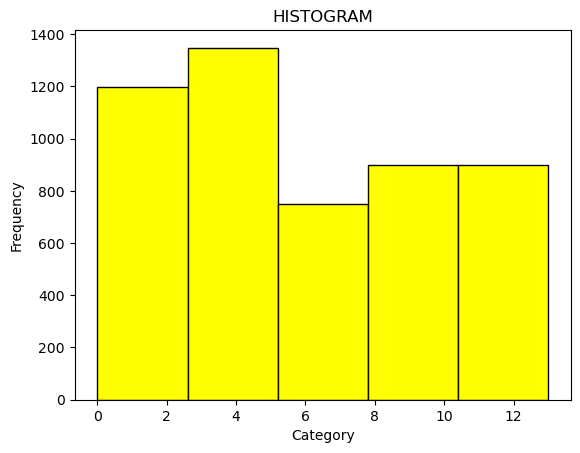

In [51]:
plt.hist(ecom['Category'],bins=5,color='yellow',edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('HISTOGRAM')
plt.show()

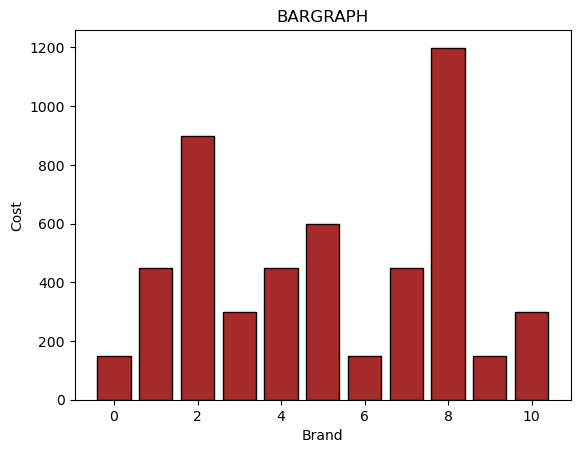

In [52]:
plt.bar(ecom['Brand'].value_counts().index,ecom['Brand'].value_counts().values,color='brown',edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Cost')
plt.title('BARGRAPH')
plt.show()

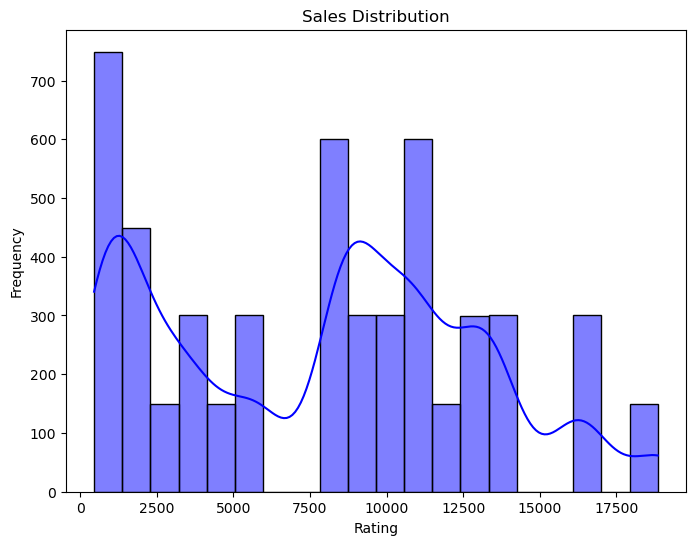

In [53]:
plt.figure(figsize=(8,6))
sns.histplot(ecom['Sales'],bins=20,kde=True,color='blue')
plt.title('Sales Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

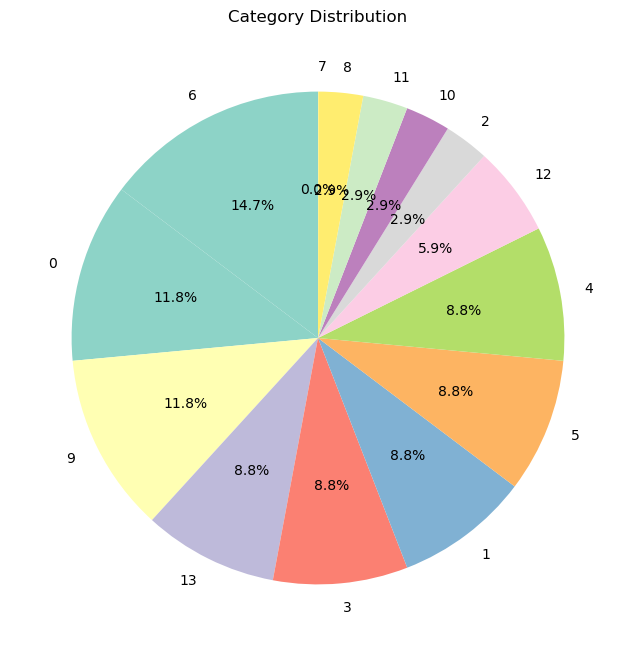

In [60]:
ecom['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,cmap='Set3',figsize=(8,8))
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

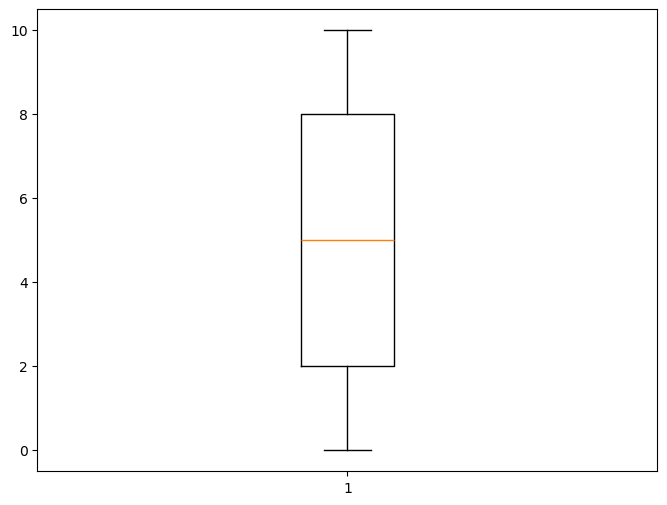

In [62]:
plt.figure(figsize=(8,6))
plt.boxplot(ecom['Brand'])
plt.show()

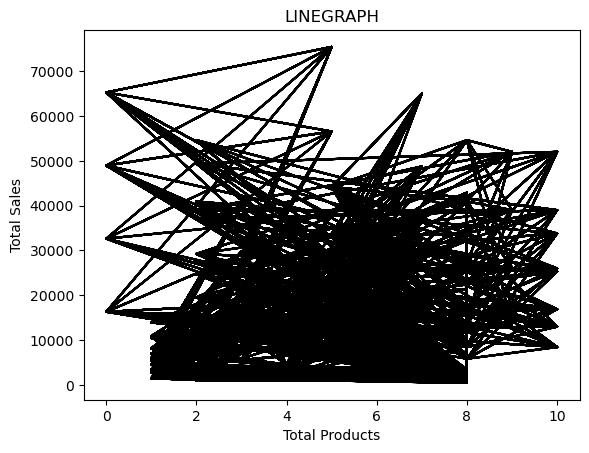

In [81]:
plt.plot(ecom['Brand'],ecom['Total_Sales'],color='black')
plt.xlabel('Total Products')
plt.ylabel('Total Sales')
plt.title('LINEGRAPH')
plt.show()

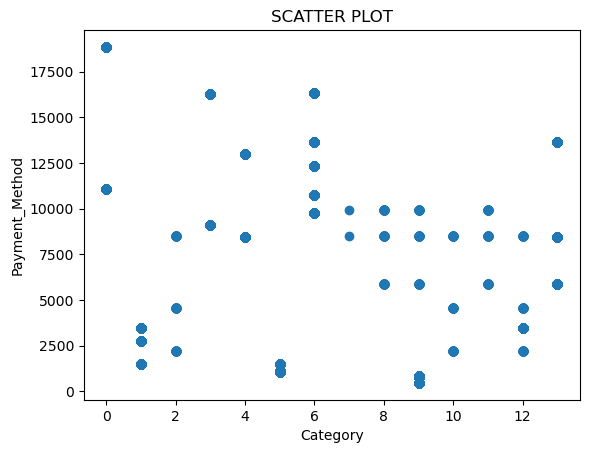

In [87]:
plt.scatter(ecom['Category'],ecom['Sales'])
plt.xlabel('Category')
plt.ylabel('Payment_Method')
plt.title('SCATTER PLOT')
plt.show()